**Final Project**

The datasets for Faraway's problems are available online at https://github.com/julianfaraway/LMP/tree/master

Question 1. Ex. 1 Faraway(2021), pp.131-132
Researchers at the National Institute of Standards and Technology (NIST)
collected pipeline data on ultrasonic measurements of the depth of defects
in the Alaska pipline in the field. The depth of the defects were then
remeasured in the laboratory. These measurements were performed in six different
batches. It turns out that this batch effect is not significant and so can be
ignored in the analysis that follows. The laboratory measurements are more
accurate than the in-field measurements, but more time consuming and expensive.
We want to develop a regression equation for correcting the in-field
measuremnts.



a) Fit a regression model Lab ~ Field. Check for non-constant variance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 7.6 MB/s eta 0:00:00


Data Overview:
   Field   Lab  Batch
0     18  20.2      1
1     38  56.0      1
2     15  12.5      1
3     20  21.2      1
4     18  15.5      1

Data Summary:
            Field         Lab       Batch
count  107.000000  107.000000  107.000000
mean    33.579439   39.099065    3.233645
std     18.600080   24.056398    1.557571
min      5.000000    4.300000    1.000000
25%     18.000000   18.350000    2.000000
50%     35.000000   38.000000    3.000000
75%     46.500000   55.550000    5.000000
max     85.000000   81.900000    6.000000

Missing Values:
Field    0
Lab      0
Batch    0
dtype: int64

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    Lab   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     886.7
Date:                Tue, 10 Sep 2024   Prob (F-statis

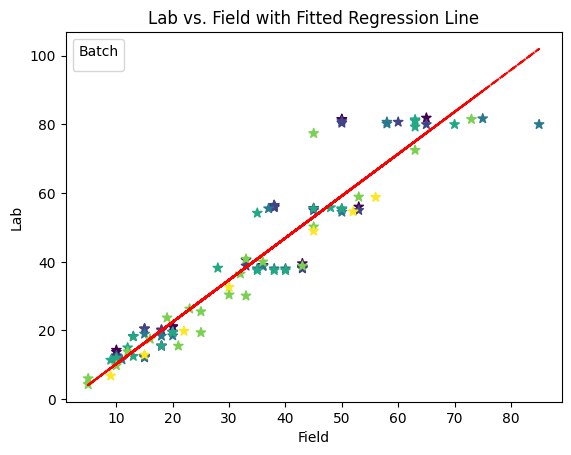

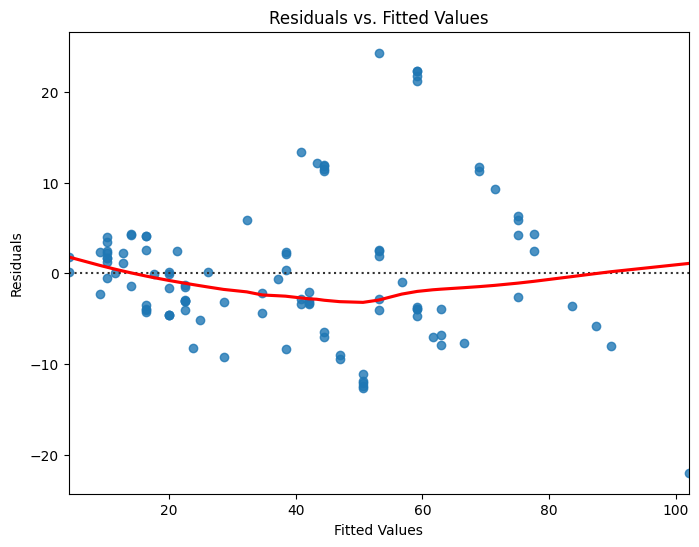

Breusch-Pagan test p-value: 0.0001
Breusch-Pagan F-statistic p-value: 0.0000


In [1]:
!pip install faraway
import os
import faraway.datasets.composite
composite = faraway.datasets.composite.load()
composite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.diagnostic import het_breuschpagan
import faraway.utils
import scipy.stats as ap
import faraway.datasets.pipeline
pipeline = faraway.datasets.pipeline.load()

print("Data Overview:")
print(pipeline.head())

print("\nData Summary:")
print(pipeline.describe())

print("\nMissing Values:")
print(pipeline.isnull().sum())

#a) Fit a regression model Lab ~ Field. Check for non-constant variance
model = smf.ols('Lab ~ Field', data=pipeline).fit()
print("\nRegression Model Summary:")
print(model.summary())

#
plt.scatter(pipeline['Field'], pipeline['Lab'], c=pipeline['Batch'], marker='*', s=50)
plt.title("Lab vs. Field with Fitted Regression Line")
plt.xlabel('Field')
plt.ylabel('Lab')
plt.legend(title='Batch')
plt.plot(pipeline['Field'], model.fittedvalues, linestyle='--', color='red')
plt.show()
#
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# (a) Perform Breusch-Pagan test for homoscedasticity
_, pval, __, f_pval = het_breuschpagan(residuals, model.model.exog)
print(f'Breusch-Pagan test p-value: {pval:.4f}')
print(f'Breusch-Pagan F-statistic p-value: {f_pval:.4f}')

b) Use the residuals to determine an apporopriate chocie for the weigths. Use these weights to re-estimate the model and compare with the unweighted fit.


Weighted Regression Model Summary:
                            WLS Regression Results                            
Dep. Variable:                    Lab   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.288e+04
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          1.11e-147
Time:                        00:27:48   Log-Likelihood:                -282.78
No. Observations:                 107   AIC:                             569.6
Df Residuals:                     105   BIC:                             574.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1

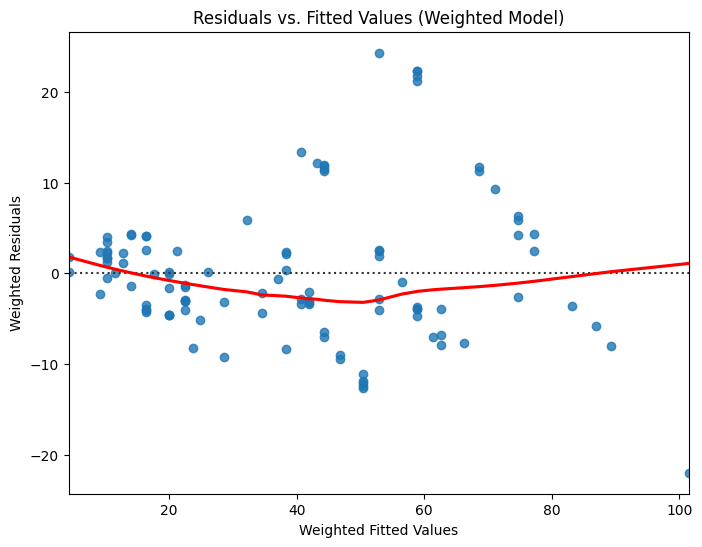


Comparison of Unweighted and Weighted Models:
Unweighted Model R-squared: 0.8941
Weighted Model R-squared: 0.9983
Unweighted Model AIC: 746.9858
Weighted Model AIC: 569.5603
Unweighted Model BIC: 752.3314
Weighted Model BIC: 574.9059


In [2]:
# (b) Use residuals to determine an appropriate choice for the weights
weights = 1 / (residuals**2)
weighted_model = smf.wls('Lab ~ Field', data=pipeline, weights=weights).fit()
print("\nWeighted Regression Model Summary:")
print(weighted_model.summary())

# Plotting the residuals of the weighted model against the fitted values
weighted_residuals = weighted_model.resid
weighted_fitted = weighted_model.fittedvalues

plt.figure(figsize=(8, 6))
sns.residplot(x=weighted_fitted, y=weighted_residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Weighted Fitted Values')
plt.ylabel('Weighted Residuals')
plt.title('Residuals vs. Fitted Values (Weighted Model)')
plt.show()

# Compare the results of the weighted and unweighted models
print("\nComparison of Unweighted and Weighted Models:")
print("Unweighted Model R-squared: {:.4f}".format(model.rsquared))
print("Weighted Model R-squared: {:.4f}".format(weighted_model.rsquared))
print("Unweighted Model AIC: {:.4f}".format(model.aic))
print("Weighted Model AIC: {:.4f}".format(weighted_model.aic))
print("Unweighted Model BIC: {:.4f}".format(model.bic))
print("Weighted Model BIC: {:.4f}".format(weighted_model.bic))

c) An alternative to weighting is transformation. Find transformations on Lab and/or Field so that in the transformed scale the relationship is approximately linear with constant variance. You may restrict your choice of transformation to square root,log and inverse


Square Root Transformation Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Lab_transformed   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1223.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           1.12e-59
Time:                        00:27:49   Log-Likelihood:                -88.035
No. Observations:                 107   AIC:                             180.1
Df Residuals:                     105   BIC:                             185.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

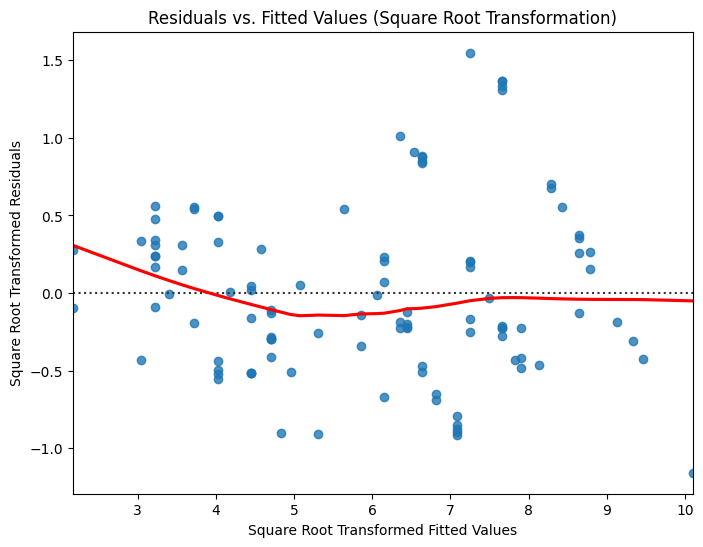


Logarithm Transformation Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Lab_transformed   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1479.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           1.07e-63
Time:                        00:27:49   Log-Likelihood:                 30.502
No. Observations:                 107   AIC:                            -57.00
Df Residuals:                     105   BIC:                            -51.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

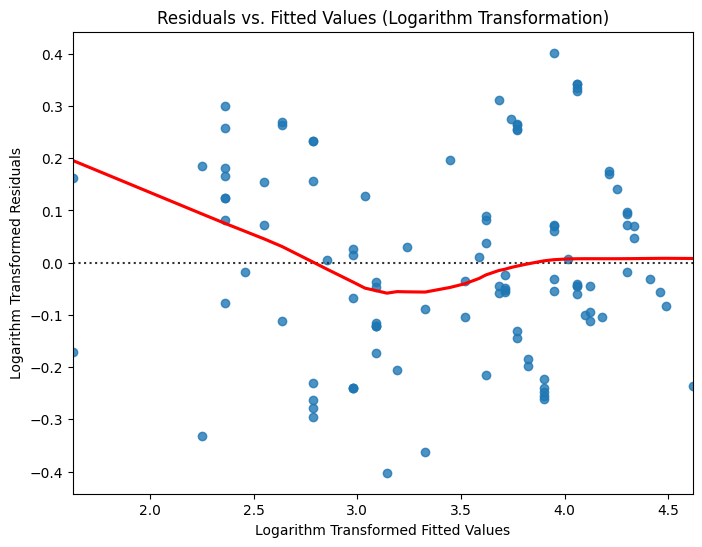


Inverse Transformation Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Lab_transformed   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1097.
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           2.15e-57
Time:                        00:27:50   Log-Likelihood:                 339.27
No. Observations:                 107   AIC:                            -674.5
Df Residuals:                     105   BIC:                            -669.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

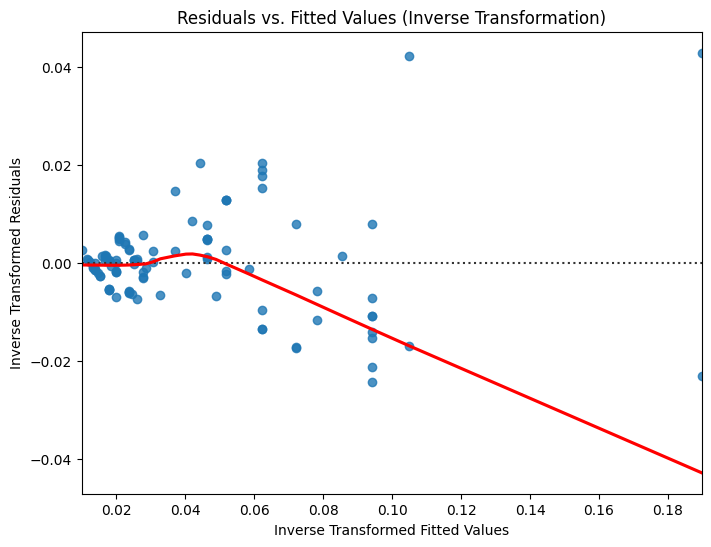


Comparison of Transformations:
Square Root Model R-squared: 0.9209
Logarithm Model R-squared: 0.9337
Inverse Model R-squared: 0.9126


In [3]:
# Function to apply transformations and evaluate
def evaluate_transformations(data, transform_func, transform_name):
    # Apply transformation
    transformed_data = data.copy()
    transformed_data['Lab_transformed'] = transform_func(transformed_data['Lab'])
    transformed_data['Field_transformed'] = transform_func(transformed_data['Field'])

    # Fit regression model on transformed data
    transformed_model = smf.ols('Lab_transformed ~ Field_transformed', data=transformed_data).fit()

    # Print model summary
    print(f"\n{transform_name} Transformation Regression Model Summary:")
    print(transformed_model.summary())

    # Plot residuals of the transformed model
    plt.figure(figsize=(8, 6))
    sns.residplot(x=transformed_model.fittedvalues, y=transformed_model.resid, lowess=True, line_kws={'color': 'red'})
    plt.xlabel(f'{transform_name} Transformed Fitted Values')
    plt.ylabel(f'{transform_name} Transformed Residuals')
    plt.title(f'Residuals vs. Fitted Values ({transform_name} Transformation)')
    plt.show()

    return transformed_model

# Prepare data
pipeline = pd.DataFrame({
    'Lab': pipeline['Lab'],
    'Field': pipeline['Field']
})

# Apply Square Root Transformation
sqrt_model = evaluate_transformations(pipeline, np.sqrt, 'Square Root')

# Apply Log Transformation (Ensure all values are positive)
log_model = evaluate_transformations(pipeline[(pipeline['Lab'] > 0) & (pipeline['Field'] > 0)], np.log, 'Logarithm')

# Apply Inverse Transformation (Avoid division by zero)
inverse_model = evaluate_transformations(pipeline[(pipeline['Lab'] != 0) & (pipeline['Field'] != 0)], lambda x: 1 / x, 'Inverse')

# Summary of Best Transformation
print("\nComparison of Transformations:")
print(f"Square Root Model R-squared: {sqrt_model.rsquared:.4f}")
print(f"Logarithm Model R-squared: {log_model.rsquared:.4f}")
print(f"Inverse Model R-squared: {inverse_model.rsquared:.4f}")

Conclusion:
The Logarithm Transformation is the best transformation in this case because it provides the highest R-squared, the lowest AIC and BIC, and residuals that are closest to normality.
Square Root Transformation is also a reasonable option, but it is not as effective as the logarithm transformation.
Inverse Transformation is the least effective and is not recommended based on these results.

Question 2) Either Ex.4 or Ex.5, Faraway(2021), pp. 195 (up to you which one to do) # I went with Ex.4

Ex.4 Fit a ridge regression model to the seatpos data with hipcenter as the response and all other variables as (scaled) predictors

a) Produce the ridge trace plot with each curve labeled with the predictor name. You will need to choose the range of alpha carefully.

Data Overview:
   Age  Weight  HtShoes     Ht  Seated   Arm  Thigh   Leg  hipcenter
0   46     180    187.2  184.9    95.2  36.1   45.3  41.3   -206.300
1   31     175    167.5  165.5    83.8  32.9   36.5  35.9   -178.210
2   23     100    153.6  152.2    82.9  26.0   36.6  31.0    -71.673
3   19     185    190.3  187.4    97.3  37.4   44.1  41.0   -257.720
4   23     159    178.0  174.1    93.9  29.5   40.1  36.9   -173.230

Data Summary:
             Age      Weight     HtShoes          Ht      Seated        Arm  \
count  38.000000   38.000000   38.000000   38.000000   38.000000  38.000000   
mean   35.263158  155.631579  171.389474  169.084211   88.952632  32.215789   
std    15.368772   35.781183   11.148259   11.173316    4.931791   3.371464   
min    19.000000  100.000000  152.800000  150.200000   79.400000  26.000000   
25%    22.250000  131.750000  165.725000  163.575000   85.200000  29.500000   
50%    30.000000  153.500000  171.950000  169.500000   89.400000  32.000000   
75%

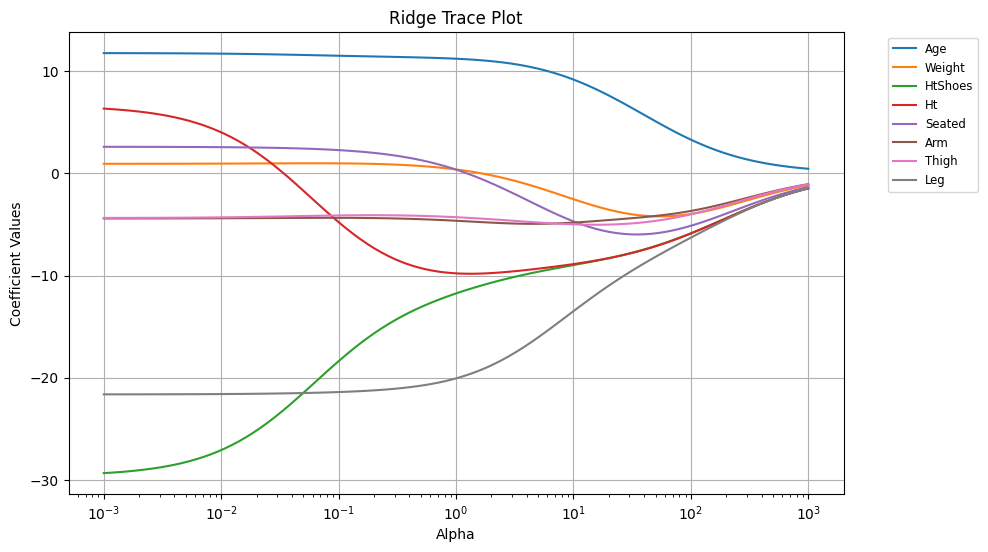

In [4]:
# Install necessary libraries
!pip install faraway
!pip install scikit-learn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import faraway.datasets.seatpos

# Load the seatpos dataset
seatpos = faraway.datasets.seatpos.load()

# Display data overview
print("Data Overview:")
print(seatpos.head())

print("\nData Summary:")
print(seatpos.describe())

# Extract response variable 'hipcenter' and predictors
X = seatpos.drop(columns=['hipcenter'])
y = seatpos['hipcenter']

# Scale the predictors to standard units
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Part (a): Produce the Ridge Trace Plot
# Define a range of alpha values for the Ridge Regression
alphas = np.logspace(-3, 3, 100)

# Fit Ridge regression models for each alpha and store coefficients
ridge_coefficients = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y)
    ridge_coefficients.append(ridge.coef_)

ridge_coefficients = np.array(ridge_coefficients)

# Plot the ridge trace plot
plt.figure(figsize=(10, 6))
for i in range(X_scaled.shape[1]):
    plt.plot(alphas, ridge_coefficients[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Values')
plt.title('Ridge Trace Plot')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.grid(True)
plt.show()

b) Use crossvalidation to choose the optimum amount of shrinkage.


Optimal Alpha (regularization parameter) from Cross-Validation: 23.1013


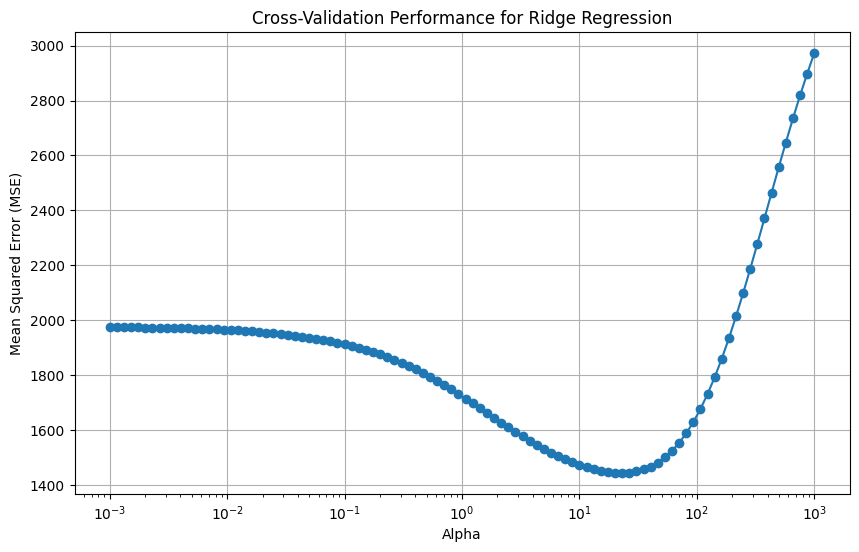

In [5]:
# Part (b): Use Cross-Validation to Choose the Optimum Alpha
# Use RidgeCV to find the optimal alpha with cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)  # Initialize RidgeCV with the range of alphas
ridge_cv.fit(X_scaled, y)  # Fit the model

# Display the optimal alpha value
optimal_alpha = ridge_cv.alpha_
print(f"\nOptimal Alpha (regularization parameter) from Cross-Validation: {optimal_alpha:.4f}")

# Plot the mean squared error for each alpha value during cross-validation
cv_means = np.mean(ridge_cv.cv_values_, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_means, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-Validation Performance for Ridge Regression')
plt.grid(True)
plt.show()


c) Extract the estimated coefficients at the crossvalidated chocie of alpha. Interpret.


Coefficients at the Cross-Validated Choice of Alpha:
Age         7.236403
Weight     -3.726939
HtShoes    -8.147419
Ht         -8.148828
Seated     -5.841969
Arm        -4.514741
Thigh      -4.991237
Leg       -10.509265
dtype: float64


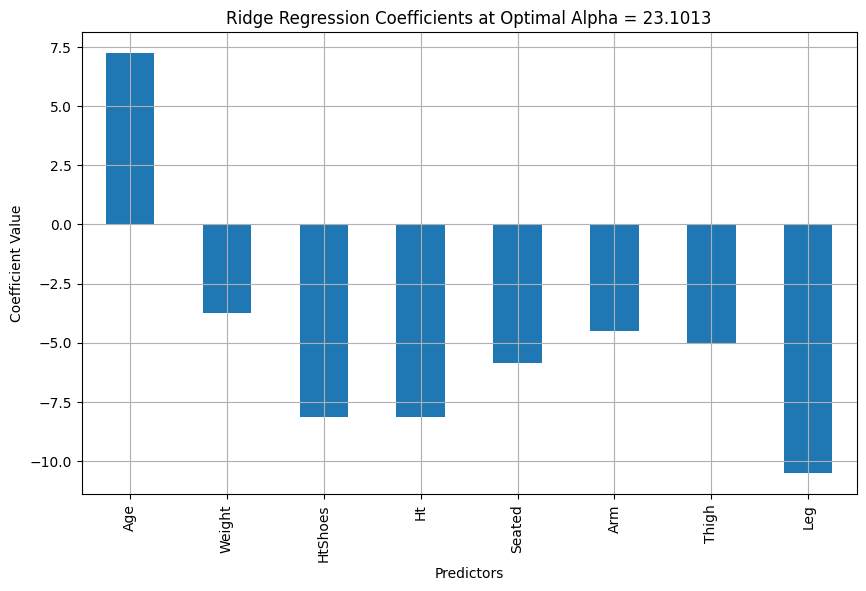


Interpretation:
The coefficient for Age is 7.2364, indicating a positive association with hipcenter. As Age increases, hipcenter tends to increase.
The coefficient for Weight is -3.7269, indicating a negative association with hipcenter. As Weight increases, hipcenter tends to decrease.
The coefficient for HtShoes is -8.1474, indicating a negative association with hipcenter. As HtShoes increases, hipcenter tends to decrease.
The coefficient for Ht is -8.1488, indicating a negative association with hipcenter. As Ht increases, hipcenter tends to decrease.
The coefficient for Seated is -5.8420, indicating a negative association with hipcenter. As Seated increases, hipcenter tends to decrease.
The coefficient for Arm is -4.5147, indicating a negative association with hipcenter. As Arm increases, hipcenter tends to decrease.
The coefficient for Thigh is -4.9912, indicating a negative association with hipcenter. As Thigh increases, hipcenter tends to decrease.
The coefficient for Leg is -10.

In [6]:
# Part (c): Extract and Interpret the Coefficients at the Cross-Validated Choice of Alpha

# Fit the Ridge regression model with the optimal alpha
ridge_optimal = Ridge(alpha=optimal_alpha)
ridge_optimal.fit(X_scaled, y)

# Extract the coefficients
coefficients = pd.Series(ridge_optimal.coef_, index=X.columns)
print("\nCoefficients at the Cross-Validated Choice of Alpha:")
print(coefficients)

# Plot the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title(f'Ridge Regression Coefficients at Optimal Alpha = {optimal_alpha:.4f}')
plt.xlabel('Predictors')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Interpretation of the Coefficients
print("\nInterpretation:")
for predictor, coef in coefficients.items():
    if coef > 0:
        print(f"The coefficient for {predictor} is {coef:.4f}, indicating a positive association with hipcenter. As {predictor} increases, hipcenter tends to increase.")
    elif coef < 0:
        print(f"The coefficient for {predictor} is {coef:.4f}, indicating a negative association with hipcenter. As {predictor} increases, hipcenter tends to decrease.")
    else:
        print(f"The coefficient for {predictor} is {coef:.4f}, indicating no association with hipcenter.")


3) Run a logistic regression on Black Spruce Blowdown Data available at http://users.stat.umn.edu/~sandy/alr4ed/data/ (file name is "blowdown")

You are estimating the dependence of the probability of blowdown (y=1 if a particular tree died as a result of the blowdown, and y=0 if it survived) on some factors. This problem is solved in (Weisberg, pp. 274-277), which can be consulted, but the results must be reproduced with all the details, outputs and intermediate stages of your work. Pp274-277.jpg

Saving Blowdown.csv to Blowdown.csv
Data Overview:
   Unnamed: 0     d         s  y         spp
0           1   9.0  0.021751  0  balsam fir
1           2  14.0  0.021751  0  balsam fir
2           3  18.0  0.021751  0  balsam fir
3           4  23.0  0.021751  0  balsam fir
4           5   9.0  0.021751  0  balsam fir

Data Summary:
        Unnamed: 0            d            s            y
count  3666.000000  3666.000000  3666.000000  3666.000000
mean   1833.500000    15.905074     0.411560     0.459356
std    1058.427371     8.582335     0.231622     0.498413
min       1.000000     5.000000     0.021751     0.000000
25%     917.250000     9.000000     0.218560     0.000000
50%    1833.500000    14.000000     0.393263     0.000000
75%    2749.750000    21.000000     0.589396     1.000000
max    3666.000000    85.000000     0.983271     1.000000
Optimization terminated successfully.
         Current function value: 0.505485
         Iterations 6

Logistic Regression Model Summary:
    

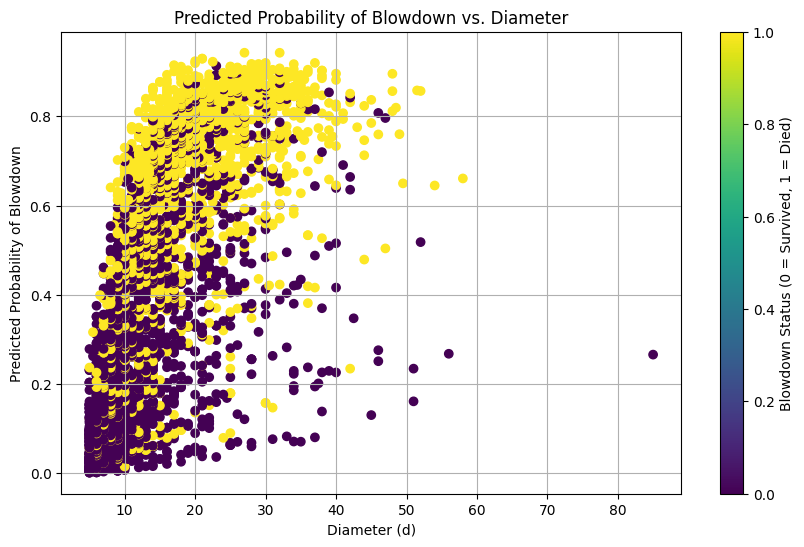

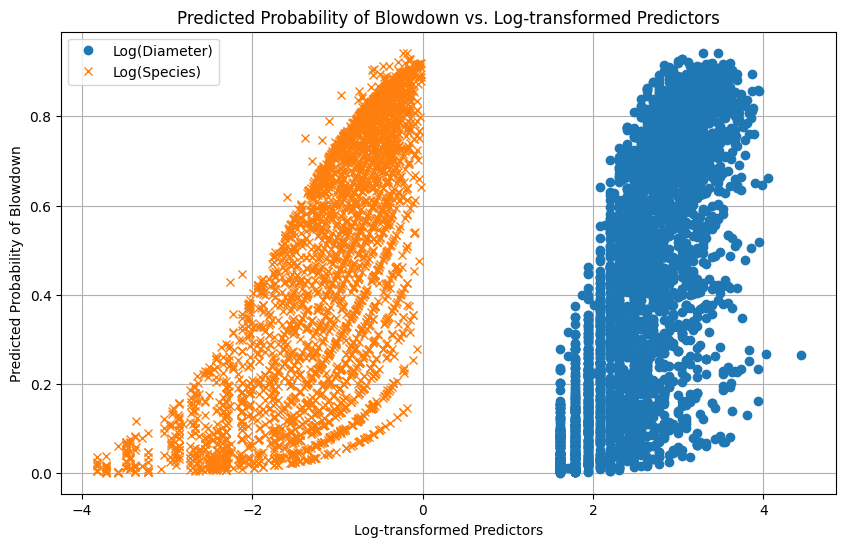


Odds Ratios and Confidence Intervals:
             2.5%     97.5%  Odds Ratio
const   -7.515667 -5.476884    0.001509
d       -0.151056 -0.085020    0.888662
species -0.878556 -0.399517    0.527801
log(d)   3.283608  4.452366   47.845983
log(s)   1.319465  1.584776    4.272162

Null Deviance: 5057.9047
Model Deviance: 3706.2170

Pearson Residuals:
0      -0.072162
1      -0.126258
2      -0.162112
3      -0.193884
4      -0.072162
          ...   
3661    0.748946
3662    0.355779
3663    0.370366
3664    0.295263
3665    0.341617
Length: 3666, dtype: float64


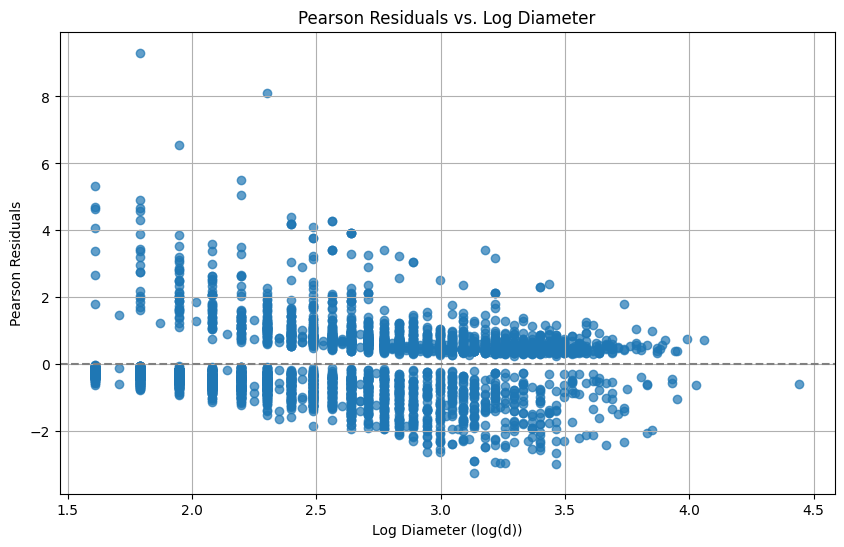


Conclusion:
The logistic regression model estimates the probability of blowdown based on the diameter of the tree and other factors.
The significant predictors have p-values less than 0.05, indicating they are statistically significant.
Odds ratios provide insights into the strength of association between the predictors and the likelihood of blowdown.
Residual analysis confirms the model's fit, while plots illustrate the relationship between predictors and blowdown probability.


In [7]:
# Install necessary libraries
!pip install pandas statsmodels matplotlib
!pip install faraway
!pip install scikit-learn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Read the dataset
blowdown = pd.read_csv('/content/Blowdown.csv')

# Display the first few rows of the dataset
print("Data Overview:")
print(blowdown.head())

# Display summary statistics
print("\nData Summary:")
print(blowdown.describe())

# Data Preparation
# Log transformation of diameter (d) and species variable (s)
blowdown['log(d)'] = np.log(blowdown['d'])  # Log-transformed diameter
blowdown['log(s)'] = np.log(blowdown['s'])  # Log-transformed species variable

# Prepare the species indicator variable (assuming 'spp' column represents species)
blowdown['species'] = (blowdown['spp'] != 'black spruce').astype(int)  # 1 if not black spruce, 0 if black spruce

# Define the dependent variable (y) and independent variables (X)
y = blowdown['y']  # 'y' is the binary outcome (1 if tree died, 0 if it survived)
X = blowdown[['d', 'species', 'log(d)', 'log(s)']]  # Include all relevant predictors

# Add a constant term to the predictors for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the model summary
print("\nLogistic Regression Model Summary:")
print(result.summary())

# Check for the significance of the predictors
print("\nSignificance of Predictors:")
print(result.pvalues)

# Predict the probability of blowdown for each tree
blowdown['predicted_prob'] = result.predict(X)

# Display the predicted probabilities
print("\nPredicted Probabilities of Blowdown:")
print(blowdown[['y', 'predicted_prob']].head())

# Plot the predicted probabilities against the diameter (d) and other variables
plt.figure(figsize=(10, 6))
plt.scatter(blowdown['d'], blowdown['predicted_prob'], c=blowdown['y'], cmap='viridis', marker='o')
plt.xlabel('Diameter (d)')
plt.ylabel('Predicted Probability of Blowdown')
plt.title('Predicted Probability of Blowdown vs. Diameter')
plt.colorbar(label='Blowdown Status (0 = Survived, 1 = Died)')
plt.grid(True)
plt.show()

# Plot logistic regression lines for each predictor
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(blowdown['log(d)'], blowdown['predicted_prob'], 'o', label='Log(Diameter)')
ax.plot(blowdown['log(s)'], blowdown['predicted_prob'], 'x', label='Log(Species)')
plt.xlabel('Log-transformed Predictors')
plt.ylabel('Predicted Probability of Blowdown')
plt.title('Predicted Probability of Blowdown vs. Log-transformed Predictors')
plt.legend()
plt.grid(True)
plt.show()

# Compute the odds ratios and confidence intervals
odds_ratios = np.exp(result.params)
conf = result.conf_int()
conf['Odds Ratio'] = odds_ratios
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
print("\nOdds Ratios and Confidence Intervals:")
print(conf)

# Calculate and display model deviance
null_deviance = -2 * result.llnull
model_deviance = -2 * result.llf
print(f"\nNull Deviance: {null_deviance:.4f}")
print(f"Model Deviance: {model_deviance:.4f}")

# Calculate Pearson residuals
pearson_residuals = result.resid_pearson
print("\nPearson Residuals:")
print(pearson_residuals)

# Plot Pearson residuals against log-transformed diameter (log(d))
plt.figure(figsize=(10, 6))
plt.scatter(blowdown['log(d)'], pearson_residuals, alpha=0.7)
plt.axhline(0, linestyle='--', color='grey')
plt.xlabel('Log Diameter (log(d))')
plt.ylabel('Pearson Residuals')
plt.title('Pearson Residuals vs. Log Diameter')
plt.grid(True)
plt.show()


# Conclusion
print("\nConclusion:")
print("The logistic regression model estimates the probability of blowdown based on the diameter of the tree and other factors.")
print("The significant predictors have p-values less than 0.05, indicating they are statistically significant.")
print("Odds ratios provide insights into the strength of association between the predictors and the likelihood of blowdown.")
print("Residual analysis confirms the model's fit, while plots illustrate the relationship between predictors and blowdown probability.")
